In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
visa=pd.read_csv('visa.csv')

#"case_status"
visa.loc[visa.case_status=="Certified", "case_status"]=1
visa.loc[visa.case_status=="Denied", "case_status"]=0
visa["case_status"]=visa["case_status"].astype(str).astype(int)


visa.head()

,Unnamed: 0,case_number,case_received_year,case_status,class_of_admission,decision_year,employer_country,employer_name,employer_num_employees,employer_state,...,job_info_experience,job_info_foreign_ed,job_info_foreign_lang_req,job_info_job_title,job_info_training,pw_amount_9089,pw_job_title_9089,pw_level_9089,pw_source_name_9089,pw_unit_of_pay_9089
0,135269,A-13316-14231,2013,1,H-1B,1432857600000000000,UNITED STATES OF AMERICA,GENERAC POWER SYSTEMS,1935,WI,...,N,Y,N,Senior Engineer,N,83366.0,Industrial Engineers,Level IV,OES,Year
1,135270,A-13316-14287,2013,0,H-1B,1435276800000000000,UNITED STATES OF AMERICA,"AMERICA'S CATCH, INC.",350,MS,...,N,N,N,Catfish Processor,N,16973.0,"Meat, Poultry, and Fish Cutters and Trimmers",Level I,OES,Year
2,135271,A-13316-14312,2013,0,H-1B,1413417600000000000,UNITED STATES OF AMERICA,"AVIDITY, LLC",4,CO,...,Y,Y,N,Protein Production Scientist,N,49982.0,Protein Production Scientist,Level I,OES,Year
3,135272,A-13316-14276,2013,1,E-2,1432598400000000000,UNITED STATES OF AMERICA,STAR COMMUNICATIONS LLC,8,WA,...,N,Y,N,Market Research Analyst,N,43514.0,Market Research Analysts and Marketing Special...,Level I,OES,Year
4,135273,A-13316-14275,2013,0,H-1B,1435276800000000000,UNITED STATES OF AMERICA,"AMERICA'S CATCH, INC.",350,MS,...,N,N,N,Catfish Processor,N,16973.0,"Meat, Poultry, and Fish Cutters and Trimmers",Level I,OES,Year


In [3]:
visa.isnull()

,Unnamed: 0,case_number,case_received_year,case_status,class_of_admission,decision_year,employer_country,employer_name,employer_num_employees,employer_state,...,job_info_experience,job_info_foreign_ed,job_info_foreign_lang_req,job_info_job_title,job_info_training,pw_amount_9089,pw_job_title_9089,pw_level_9089,pw_source_name_9089,pw_unit_of_pay_9089
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84174,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
84175,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
84176,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
84177,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


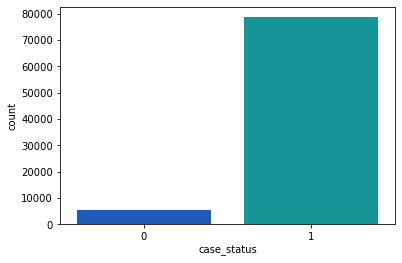

In [4]:
sns.countplot(x="case_status",data=visa, palette="winter")

In [5]:
visa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84179 entries, 0 to 84178
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     84179 non-null  int64  
 1   case_number                    84179 non-null  object 
 2   case_received_year             84179 non-null  int64  
 3   case_status                    84179 non-null  int64  
 4   class_of_admission             84179 non-null  object 
 5   decision_year                  84179 non-null  int64  
 6   employer_country               84179 non-null  object 
 7   employer_name                  84179 non-null  object 
 8   employer_num_employees         84179 non-null  int64  
 9   employer_state                 84171 non-null  object 
 10  employer_yr_estab              84179 non-null  float64
 11  foreign_worker_info_education  84179 non-null  object 
 12  foreign_worker_info_major      84179 non-null 

### Convert categorical features to dummy variables 

In [6]:
class_of_admission = pd.get_dummies(visa["class_of_admission"],drop_first=True)
foreign_worker_info_education = pd.get_dummies(visa["foreign_worker_info_education"],drop_first=True)
country_of_citizenship = pd.get_dummies(visa["country_of_citizenship"],drop_first=True)
fw_info_rel_occup_exp = pd.get_dummies(visa["fw_info_rel_occup_exp"],drop_first=True)
fw_info_req_experience = pd.get_dummies(visa["fw_info_req_experience"],drop_first=True)
job_info_education = pd.get_dummies(visa["job_info_education"],drop_first=True)
job_info_experience = pd.get_dummies(visa["job_info_experience"],drop_first=True)
job_info_training = pd.get_dummies(visa["job_info_training"],drop_first=True)

In [7]:
visa.drop(["class_of_admission","foreign_worker_info_education","country_of_citizenship",
          "fw_info_rel_occup_exp","fw_info_req_experience","job_info_education","job_info_experience",
          "job_info_training","pw_level_9089","case_number","employer_country","employer_name","employer_state",
          "foreign_worker_info_major","foreign_worker_info_state","fw_info_alt_edu_experience","fw_info_birth_country",
          "job_info_foreign_ed","job_info_foreign_lang_req","job_info_job_title","pw_job_title_9089","pw_source_name_9089",
          "pw_unit_of_pay_9089"],axis=1,inplace=True)

In [8]:
visa=pd.concat([visa,class_of_admission,foreign_worker_info_education,country_of_citizenship,
          fw_info_rel_occup_exp,fw_info_req_experience,job_info_education,job_info_experience,
          job_info_training],axis=1)

In [9]:
visa.head()

,Unnamed: 0,case_received_year,case_status,decision_year,employer_num_employees,employer_yr_estab,job_info_alt_occ_num_months,pw_amount_9089,A1/A2,B-1,...,ZAMBIA,ZIMBABWE,Bachelor's,Doctorate,High School,Master's,None,Other,Y,Y
0,135269,2013,1,1432857600000000000,1935,1959.0,84.0,83366.0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,135270,2013,0,1435276800000000000,350,1988.0,60.0,16973.0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,135271,2013,0,1413417600000000000,4,1996.0,60.0,49982.0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,135272,2013,1,1432598400000000000,8,2010.0,60.0,43514.0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,135273,2013,0,1435276800000000000,350,1988.0,60.0,16973.0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [10]:
visa.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84179 entries, 0 to 84178
Data columns (total 247 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   Unnamed: 0                        int64  
 1   case_received_year                int64  
 2   case_status                       int64  
 3   decision_year                     int64  
 4   employer_num_employees            int64  
 5   employer_yr_estab                 float64
 6   job_info_alt_occ_num_months       float64
 7   pw_amount_9089                    float64
 8   A1/A2                             uint8  
 9   B-1                               uint8  
 10  B-2                               uint8  
 11  C-1                               uint8  
 12  C-3                               uint8  
 13  D-1                               uint8  
 14  E-1                               uint8  
 15  E-2                               uint8  
 16  E-3                               uint8

### Test-Train-Split

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(visa.drop("case_status",axis=1), 
                                                    visa["case_status"],random_state=1)

In [12]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

In [13]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.07      1.00      0.13      1430
           1       0.00      0.00      0.00     19615

    accuracy                           0.07     21045
   macro avg       0.03      0.50      0.06     21045
weighted avg       0.00      0.07      0.01     21045

